# **MNIST Handwritten Digits Classification**
A FFNN (Feed Forward Neural Network) and CNN (Convolutional Nerual Network) have been modeled

## Import required packages

In [1]:
import numpy as np 
import torch 
from torchvision import datasets,transforms
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

C:\Users\satya\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import torchvision.transforms as transforms

## Defining our Transforms

In [ ]:
transform=transforms.Compose([transforms.ToTensor()])

## Gathering the train and test data


In [ ]:
train_data=datasets.MNIST('data',train=True,download=True,transform=transform)
test_data=datasets.MNIST('data',train=False,download=True,transform=transform)

## Defining our Train, Valid and Test Dataloaders

In [6]:
valid_size=0.2

# IMPORTANT 
batch_size=20

num_workers=0

train_length = len(train_data)

# obtain training dataset indices that will be used for validation dataset
indices = list(range(train_length))

np.random.shuffle(indices)
split = int(np.floor(valid_size * train_length))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders for train, test and validation dataset
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [7]:
# This is for debugging
train_idx.__len__(),valid_idx.__len__()

(48000, 12000)

In [8]:
# Printing the length of our train, valid and test dataloaders
# NOTE : Here batch size is 20
len(train_loader),len(valid_loader),len(test_loader)

(2400, 600, 500)

In [9]:

# checking our data
images,labels=next(iter(train_loader))

print(images, images.shape, len(images), images[0].shape)
print()
print(labels,labels.shape,len(labels))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

## Visualizing a Training batch

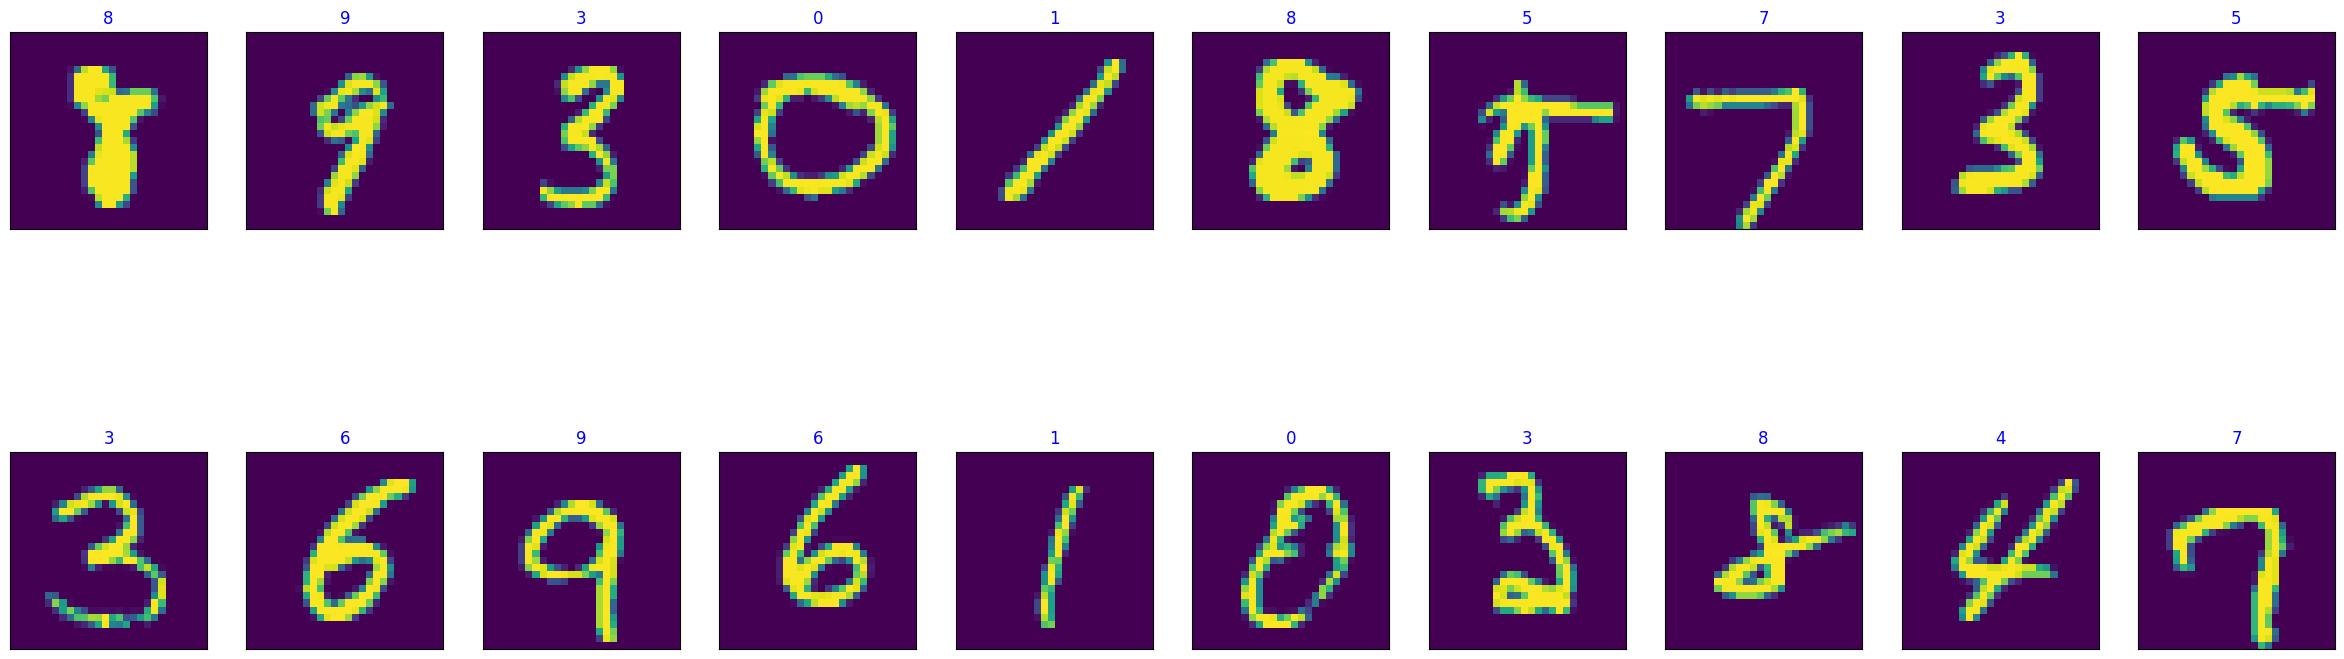

In [10]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels)):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images[i]))
    ax.set_title(labels[i].item(),color='blue')

## Defining our Neural Net Architecture

In [11]:

# Model 1 : This model has dropout set to a certain value
# NOTE : When we want to use dropout we ensure we run train() method on our model --- during training , if not required we should use eval() method --- validation and testing
class FNet(nn.Module):
    def __init__(self):
        super(FNet,self).__init__()
        self.fc1=nn.Linear(784,512)
        self.fc2=nn.Linear(512,256)
        self.out=nn.Linear(256,10)
        
        # Dropout probability - set for avoiding overfitting
        self.dropout=nn.Dropout(0.2)

    def forward(self,x):
        x = x.view(-1, 28 * 28)        
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.out(x)
        return x

class convNet(nn.Module):
  def __init__(self):
    super(convNet,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,padding=1,stride=1)
    self.conv2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1,stride=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)


    self.fc1=nn.Linear(7*7*32,512)
    self.fc2=nn.Linear(512,256)
    self.out=nn.Linear(256,10)
    self.dropout=nn.Dropout(0.2)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,7*7*32)
    x = self.dropout(x)
    x=self.dropout(F.relu(self.fc1(x)))
    x=self.dropout(F.relu(self.fc2(x)))
    x=self.out(x)
    return x
    

In [12]:
model_1=FNet()
model_2=convNet()

def weight_init_normal(m):
    classname=m.__class__.__name__
    if classname.find('Linear')!=-1:
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
model_1.apply(weight_init_normal),model_2.apply(weight_init_normal)
use_cuda=True
if use_cuda and torch.cuda.is_available():
  model_1.cuda()
  model_2.cuda()


print(model_1,'\n\n\n\n',model_2,'\n\n\n\n','On GPU : ',torch.cuda.is_available())

FNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



 convNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



 On GPU :  False


## Defining our Loss Function

In [13]:
# Loss Function
# If we did not compute softmax at output use nn.CrossentropyLoss() else use nn.NLLLoss()
criterion=nn.CrossEntropyLoss()


## Training and Validation Phase

In [14]:
def trainNet(model,lr):
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[],'valid':[]}
    epochs=20

    # minimum validation loss ----- set initial minimum to infinity
    valid_loss_min = np.Inf 

    for epoch in range(epochs):
        train_loss=0.0
        valid_loss=0.0

        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images,labels in train_loader:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            optimizer.zero_grad()
            output=model(images)
            loss=criterion(output,labels)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        """
        VALIDATION PHASE
        """
        model.eval() # TURN OFF DROPOUT for validation
        for images,labels in valid_loader:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            output=model(images)
            loss=criterion(output,labels)
            valid_loss+=loss.item()

        # Calculating loss over entire batch size for every epoch
        train_loss = train_loss/len(train_loader)
        valid_loss = valid_loss/len(valid_loader)


        # saving loss values
        loss_keeper['train'].append(train_loss)
        loss_keeper['valid'].append(valid_loss)

        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}\tValidation Loss : {valid_loss}")
        if valid_loss<=valid_loss_min:
            print(f"Validation loss decreased from : {valid_loss_min} ----> {valid_loss} ----> Saving Model.......")
            z=type(model).__name__
            torch.save(model.state_dict(), z+'_model.pth')
            valid_loss_min=valid_loss
    return(loss_keeper)

In [ ]:
m1_loss=trainNet(model_1,0.001)


Epoch : 1	Training Loss : 0.23914088901598007	Validation Loss : 0.14058637941159152
Validation loss decreased from : inf ----> 0.14058637941159152 ----> Saving Model.......

Epoch : 2	Training Loss : 0.11643780427448898	Validation Loss : 0.11923217946789616
Validation loss decreased from : 0.14058637941159152 ----> 0.11923217946789616 ----> Saving Model.......

Epoch : 3	Training Loss : 0.08771795704959308	Validation Loss : 0.10624778831954851
Validation loss decreased from : 0.11923217946789616 ----> 0.10624778831954851 ----> Saving Model.......

Epoch : 4	Training Loss : 0.07336915357561641	Validation Loss : 0.0997469085371146
Validation loss decreased from : 0.10624778831954851 ----> 0.0997469085371146 ----> Saving Model.......

Epoch : 5	Training Loss : 0.06220658673136048	Validation Loss : 0.1220576847897731

Epoch : 6	Training Loss : 0.05653916235551852	Validation Loss : 0.0957679577239234
Validation loss decreased from : 0.0997469085371146 ----> 0.0957679577239234 ----> Saving 

In [ ]:
m1_loss

In [ ]:
m2_loss=trainNet(model_2,0.001)

In [ ]:
m2_loss

## Loading model from Lowest Validation Loss

In [17]:
# Loading the model from the lowest validation loss 
model_1.load_state_dict(torch.load('FNet_model.pth'))
model_2.load_state_dict(torch.load('convNet_model.pth'))


<All keys matched successfully>

In [18]:
print(model_1.state_dict,'\n\n\n\n',model_2.state_dict)

<bound method Module.state_dict of FNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)> 



 <bound method Module.state_dict of convNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>


In [ ]:
import matplotlib.pyplot as plt

# Sample data for model losses and accuracies
m1_loss = {'train': [0.5, 0.4, 0.3], 'valid': [0.6, 0.5, 0.4]}
m1_accuracy = {'train': [0.75, 0.80, 0.85], 'valid': [0.70, 0.75, 0.80]}
m2_loss = {'train': [0.4, 0.3, 0.2], 'valid': [0.5, 0.4, 0.3]}
m2_accuracy = {'train': [0.80, 0.85, 0.90], 'valid': [0.75, 0.80, 0.85]}

title = ['FFNN', 'CNN']
model_data = [{'loss': m1_loss, 'accuracy': m1_accuracy}, {'loss': m2_loss, 'accuracy': m2_accuracy}]
fig = plt.figure(1, figsize=(15, 5))

for idx, model in enumerate(model_data, start=1):
    loss_data = model['loss']
    accuracy_data = model['accuracy']
    ax_loss = fig.add_subplot(1, 2, idx)
    ax_loss.plot(loss_data['train'], label="Training Loss")
    ax_loss.plot(loss_data['valid'], label="Validation Loss")
    ax_loss.set_title('MNIST-Digits: ' + title[idx - 1] + ' - Loss')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')
    ax_loss.legend()

    fig_accuracy = plt.figure(figsize=(15, 5))
    ax_accuracy = fig_accuracy.add_subplot(1, 2, idx)
    ax_accuracy.plot(accuracy_data['train'], label="Training Accuracy")
    ax_accuracy.plot(accuracy_data['valid'], label="Validation Accuracy")
    ax_accuracy.set_title('MNIST-Digits: ' + title[idx - 1] + ' - Accuracy')
    ax_accuracy.set_xlabel('Epoch')
    ax_accuracy.set_ylabel('Accuracy')
    ax_accuracy.legend()

plt.show()


## Plotting Training and Validation Losses

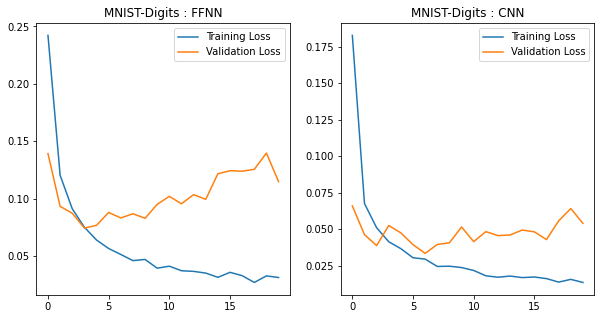

In [19]:
title=['FFNN','CNN']
model_losses=[m1_loss,m2_loss]
fig=plt.figure(1,figsize=(10,5))
idx=1
for i in model_losses:
  ax=fig.add_subplot(1,2,idx)
  ax.plot(i['train'],label="Training Loss")
  ax.plot(i['valid'],label="Validation Loss")
  ax.set_title('MNIST-Digits : '+title[idx-1])
  idx+=1
  plt.legend();

## Testing Phase

In [20]:
def test(model):
    correct=0
    test_loss=0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval() # test the model with dropout layers off
    for images,labels in test_loader:
        if use_cuda and torch.cuda.is_available():
            images,labels=images.cuda(),labels.cuda()
        output=model(images)
        loss=criterion(output,labels)
        test_loss+=loss.item()
        _,pred=torch.max(output,1)
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))

        for i in range(batch_size):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    test_loss=test_loss/len(test_loader)
    print(f'For {type(model).__name__} :')
    print(f"Test Loss: {test_loss}")
    print(f"Correctly predicted per class : {class_correct}, Total correctly perdicted : {sum(class_correct)}")
    print(f"Total Predictions per class : {class_total}, Total predictions to be made : {sum(class_total)}\n")
    for i in range(10):
      if class_total[i] > 0:
          print(f"Test Accuracy of class {i} : {float(100 * class_correct[i] / class_total[i])}% where {int(np.sum(class_correct[i]))} of {int(np.sum(class_total[i]))} were predicted correctly")
      else:
          print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print(f"\nOverall Test Accuracy : {float(100. * np.sum(class_correct) / np.sum(class_total))}% where {int(np.sum(class_correct))} of {int(np.sum(class_total))} were predicted correctly")
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # get sample outputs
    if use_cuda and torch.cuda.is_available():
      images,labels=images.cuda(),labels.cuda()
    output = model(images)
    # convert output probabilities to predicted class
    _, preds = torch.max(output, 1)
    # prep images for display
    images = images.cpu().numpy()

    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(25, 4))
    for idx in np.arange(20):
        ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[idx]))
        ax.set_title("{} for ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                    color=("blue" if preds[idx]==labels[idx] else "red"))

## Visualizing a Test batch with results

FFNN

For FNet :
Test Loss: 0.07923624516067411
Correctly predicted per class : [972.0, 1123.0, 1005.0, 987.0, 962.0, 863.0, 929.0, 1009.0, 951.0, 980.0], Total correctly perdicted : 9781.0
Total Predictions per class : [980.0, 1135.0, 1032.0, 1010.0, 982.0, 892.0, 958.0, 1028.0, 974.0, 1009.0], Total predictions to be made : 10000.0

Test Accuracy of class 0 : 99.18367346938776% where 972 of 980 were predicted correctly
Test Accuracy of class 1 : 98.94273127753304% where 1123 of 1135 were predicted correctly
Test Accuracy of class 2 : 97.38372093023256% where 1005 of 1032 were predicted correctly
Test Accuracy of class 3 : 97.72277227722772% where 987 of 1010 were predicted correctly
Test Accuracy of class 4 : 97.9633401221996% where 962 of 982 were predicted correctly
Test Accuracy of class 5 : 96.74887892376681% where 863 of 892 were predicted correctly
Test Accuracy of class 6 : 96.97286012526096% where 929 of 958 were predicted correctly
Test Accuracy of class 7 : 98.15175097276264% whe

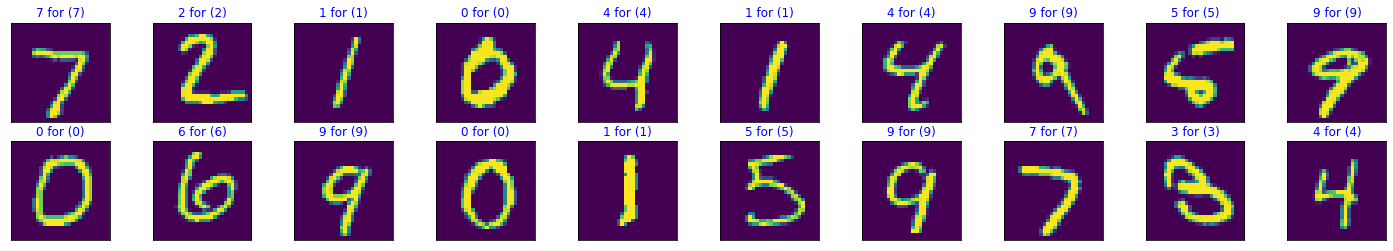

In [21]:
test(model_1)

### CNN

For convNet :
Test Loss: 0.026931680879527447
Correctly predicted per class : [978.0, 1131.0, 1020.0, 1007.0, 980.0, 879.0, 947.0, 1019.0, 966.0, 984.0], Total correctly perdicted : 9911.0
Total Predictions per class : [980.0, 1135.0, 1032.0, 1010.0, 982.0, 892.0, 958.0, 1028.0, 974.0, 1009.0], Total predictions to be made : 10000.0

Test Accuracy of class 0 : 99.79591836734694% where 978 of 980 were predicted correctly
Test Accuracy of class 1 : 99.64757709251101% where 1131 of 1135 were predicted correctly
Test Accuracy of class 2 : 98.83720930232558% where 1020 of 1032 were predicted correctly
Test Accuracy of class 3 : 99.70297029702971% where 1007 of 1010 were predicted correctly
Test Accuracy of class 4 : 99.79633401221996% where 980 of 982 were predicted correctly
Test Accuracy of class 5 : 98.54260089686099% where 879 of 892 were predicted correctly
Test Accuracy of class 6 : 98.8517745302714% where 947 of 958 were predicted correctly
Test Accuracy of class 7 : 99.1245136186770

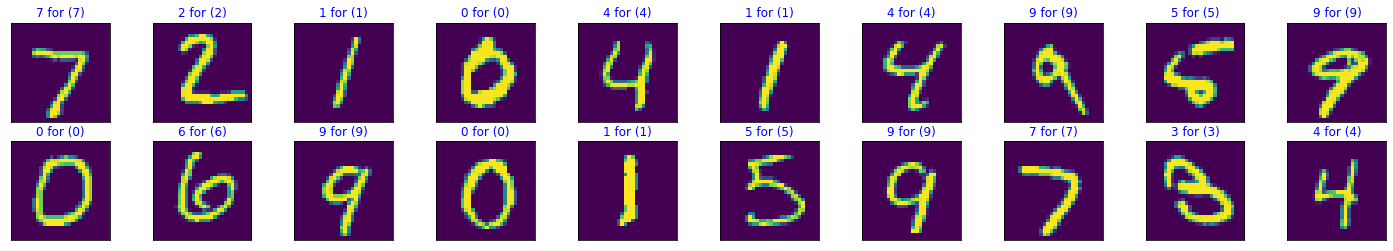

In [22]:
test(model_2)

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
def load_data():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

    return trainloader, testloader

In [13]:
# Step 2: Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [14]:
# Step 3: Training the model
def train_model(trainloader):
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 5
    losses = []
    accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if i % 100 == 99:
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
                losses.append(running_loss / 100)
                accuracies.append(100 * correct / total)
                running_loss = 0.0
                correct = 0
                total = 0
    print('Finished Training')
    return model, losses, accuracies

In [15]:
# Step 4: Plotting accuracy and loss graphs
def plot_graphs(losses, accuracies):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.show()

In [16]:
# Step 5: Generating confusion matrix
def generate_confusion_matrix(model, testloader):
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.numpy())
            all_preds.extend(predicted.numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [17]:

# Step 6: Saving the model
def save_model(model, path):
    torch.save(model.state_dict(), path)

In [18]:
# Step 7: GUI for handwritten digit recognition
class DigitRecognizerApp:
    def __init__(self, model_path):
        self.model = CNN()
        self.model.load_state_dict(torch.load(model_path))
        self.model.eval()

    def preprocess_image(self, image):
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
        image = transform(image)
        return image

    def predict_digit(self, image):
        image = self.preprocess_image(image)
        image = image.unsqueeze(0)
        with torch.no_grad():
            output = self.model(image)
            _, predicted = torch.max(output, 1)
        return predicted.item()

[1,   100] loss: 0.725
[1,   200] loss: 0.283
[1,   300] loss: 0.221
[1,   400] loss: 0.186
[1,   500] loss: 0.155
[1,   600] loss: 0.142
[1,   700] loss: 0.129
[1,   800] loss: 0.128
[1,   900] loss: 0.116
[2,   100] loss: 0.106
[2,   200] loss: 0.099
[2,   300] loss: 0.101
[2,   400] loss: 0.096
[2,   500] loss: 0.098
[2,   600] loss: 0.091
[2,   700] loss: 0.093
[2,   800] loss: 0.098
[2,   900] loss: 0.078
[3,   100] loss: 0.071
[3,   200] loss: 0.074
[3,   300] loss: 0.075
[3,   400] loss: 0.094
[3,   500] loss: 0.071
[3,   600] loss: 0.072
[3,   700] loss: 0.073
[3,   800] loss: 0.073
[3,   900] loss: 0.066
[4,   100] loss: 0.062
[4,   200] loss: 0.064
[4,   300] loss: 0.069
[4,   400] loss: 0.054
[4,   500] loss: 0.062
[4,   600] loss: 0.059
[4,   700] loss: 0.062
[4,   800] loss: 0.059
[4,   900] loss: 0.058
[5,   100] loss: 0.048
[5,   200] loss: 0.058
[5,   300] loss: 0.057
[5,   400] loss: 0.060
[5,   500] loss: 0.066
[5,   600] loss: 0.049
[5,   700] loss: 0.056
[5,   800] 

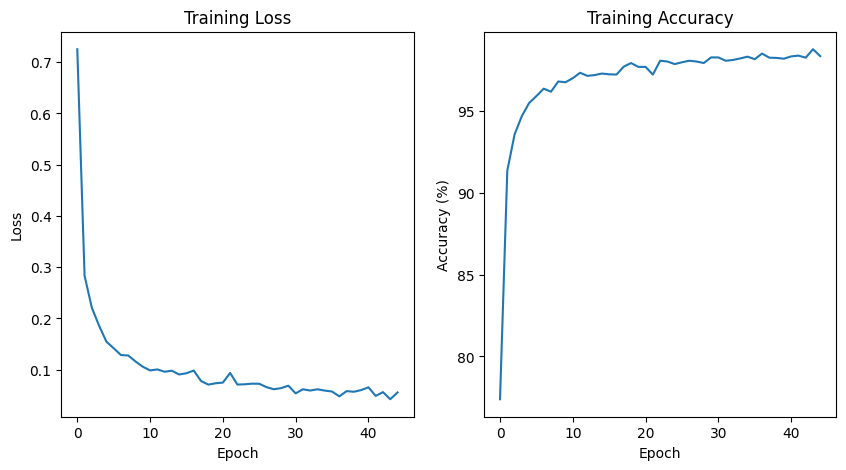

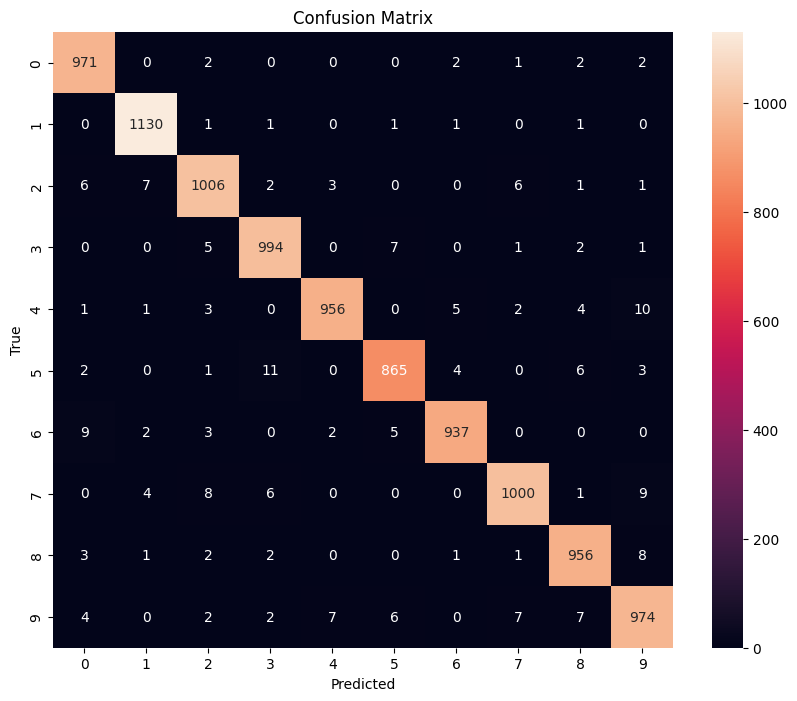

In [19]:
# Main function
if __name__ == "__main__":
    # Step 1: Loading the dataset
    trainloader, testloader = load_data()
    
    # Step 2: Training the model
    model, losses, accuracies = train_model(trainloader)
    
    # Step 3: Plotting accuracy and loss graphs
    plot_graphs(losses, accuracies)
    
    # Step 4: Generating confusion matrix
    generate_confusion_matrix(model, testloader)
    
    # Step 5: Saving the model
    save_model(model, "convNet_model.pth")

In [32]:
def print_accuracy(model, dataloader, dataset_name):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on {dataset_name}: {accuracy:.2f}%')

# Assuming your model and dataloaders are already defined
# For example:
# model = CNN()
# model.load_state_dict(torch.load("convNet_model.pth"))
# trainloader, testloader = split_data(trainset, testset)

print_accuracy(model, trainloader, "Training")
print_accuracy(model, testloader, "Testing")


Accuracy on Training: 98.62%
Accuracy on Testing: 98.03%
